<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Primarly_VitalDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyvital vitaldb vital
!pip install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.8/428.8 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 5.5 

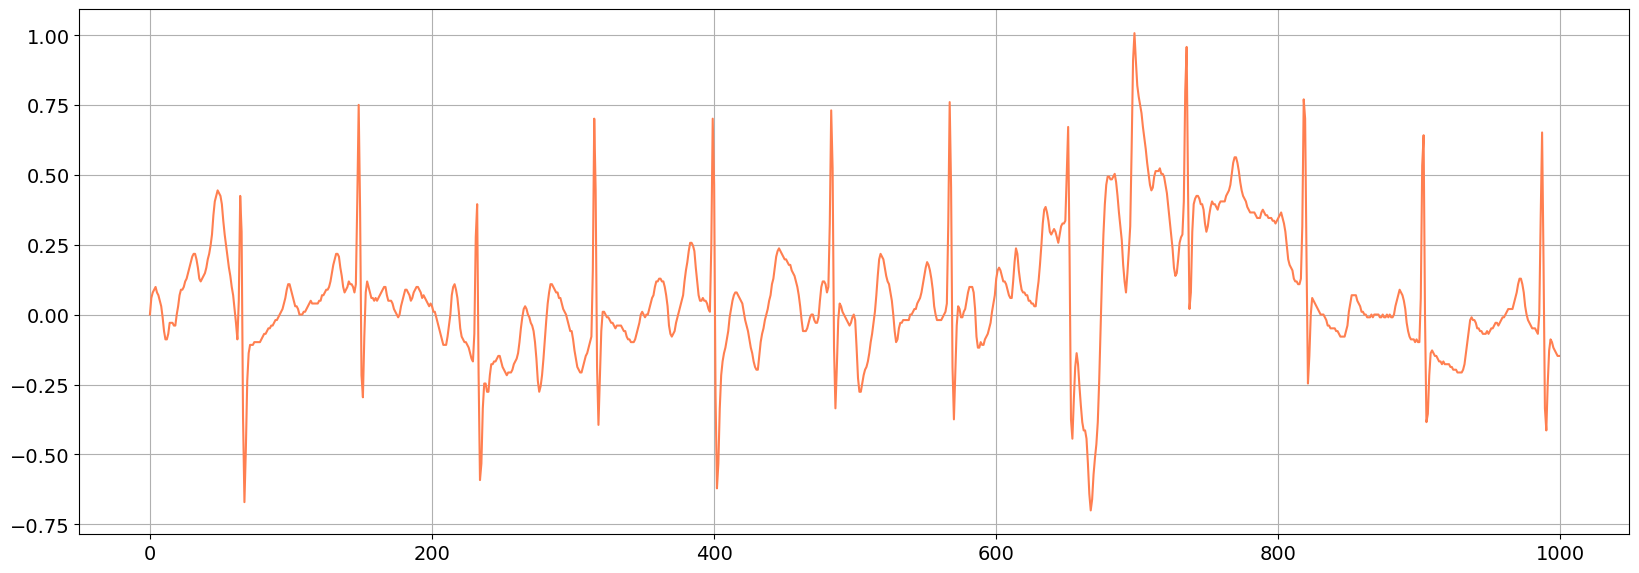

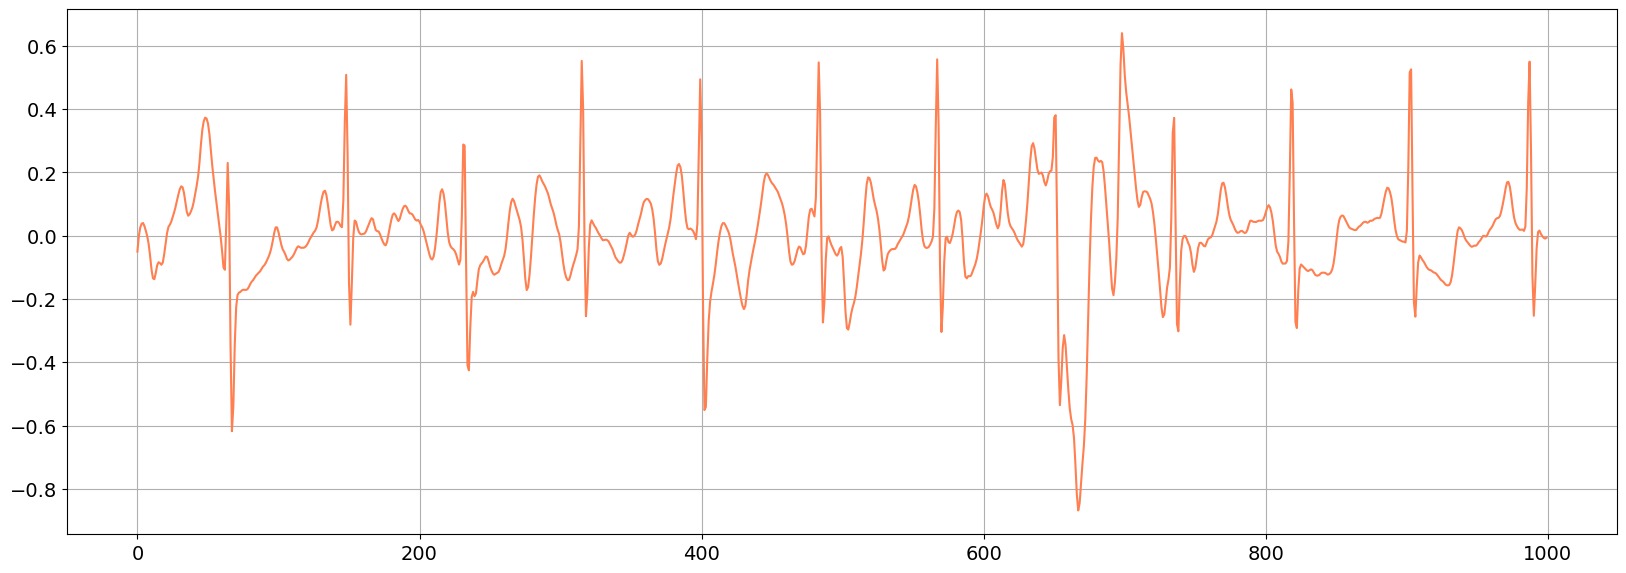

In [2]:

import vitaldb
import neurokit2 as nk
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size']= 14




srate = 100
vals = vitaldb.load_case(10, ['SNUADC/ECG_II','SNUADC/ART'], 1 / srate)

signal = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]

ecg = signal[110000:111000]#vals[110000:111000, 0]
art = vals[110000:111000, 1]

def nrml_plt(sig):
  plt.figure(figsize=(20,15))
  plt.subplot(211)
  plt.plot(sig, color='coral')
  plt.grid(True)
  plt.show()


nrml_plt(ecg)
ecg = nk.ecg_clean(ecg, sampling_rate=srate)
nrml_plt(ecg)

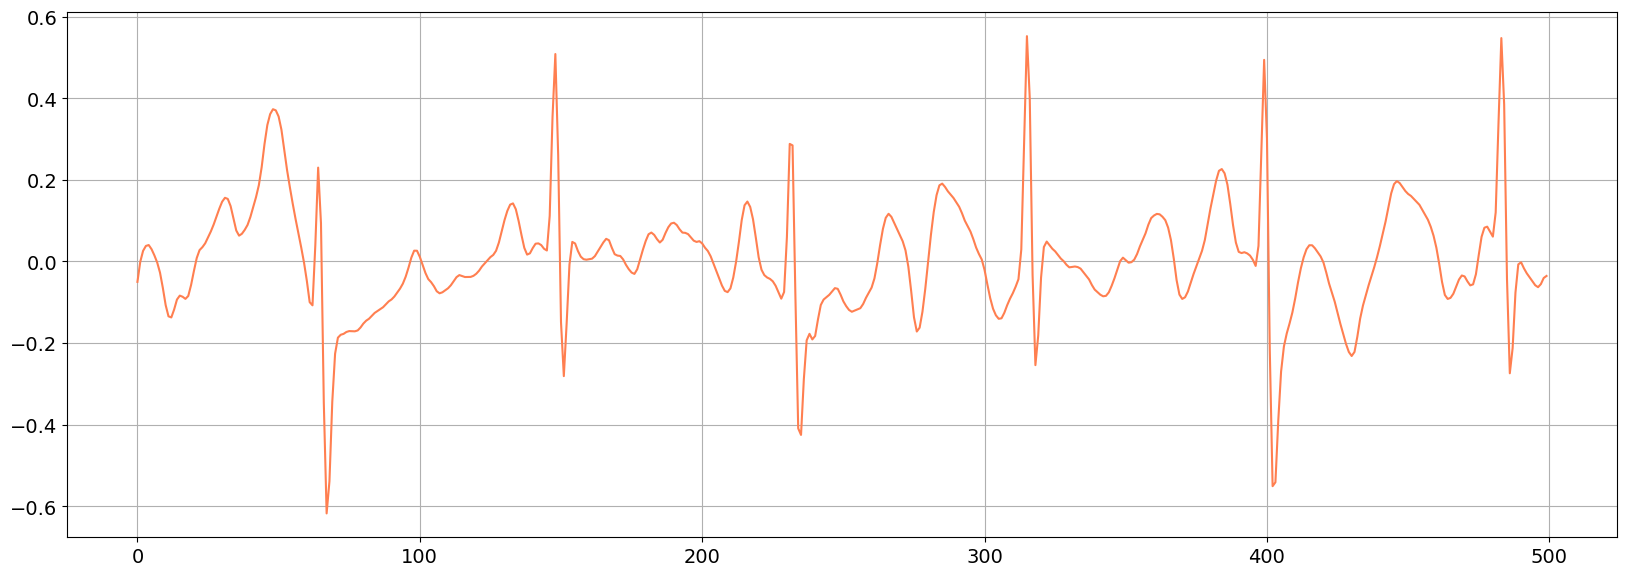

In [3]:
nrml_plt(ecg[0:500])

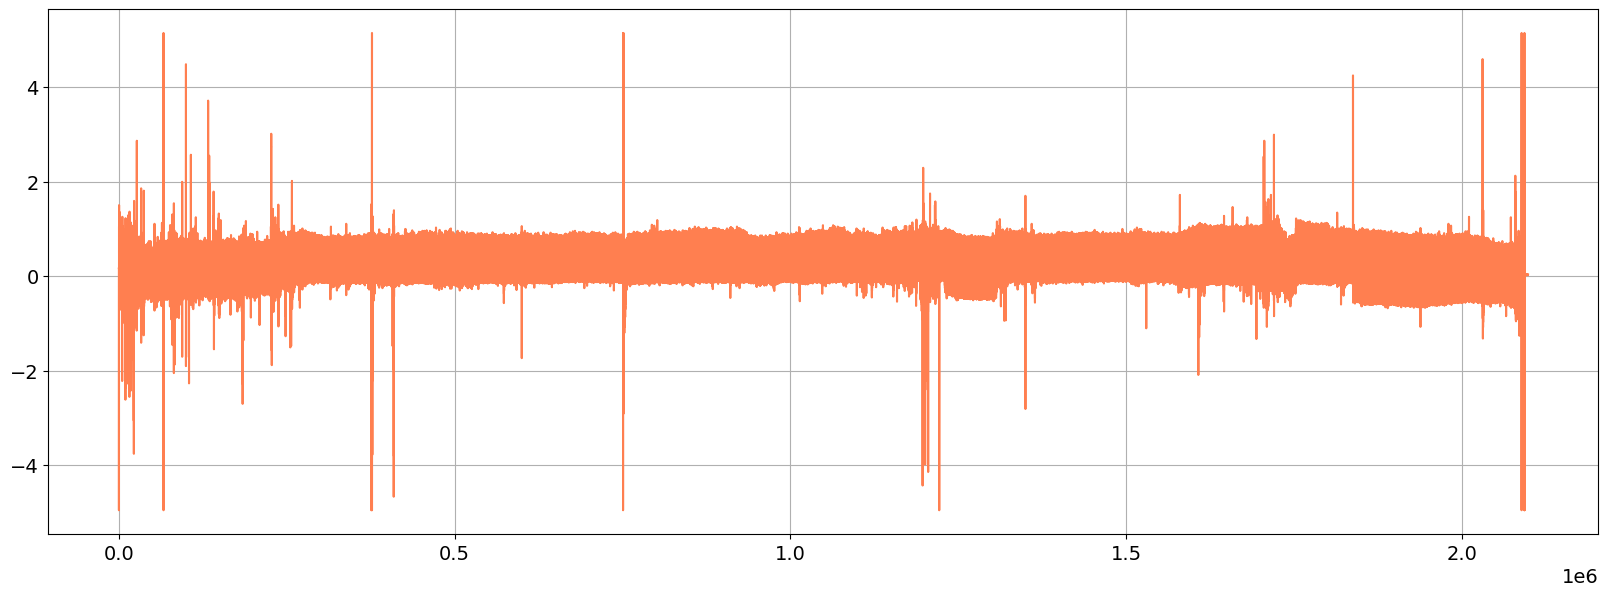

In [4]:
nrml_plt(signal)

In [5]:
o = []
for i in range(len(signal[0:3000])):
  o.append(i)


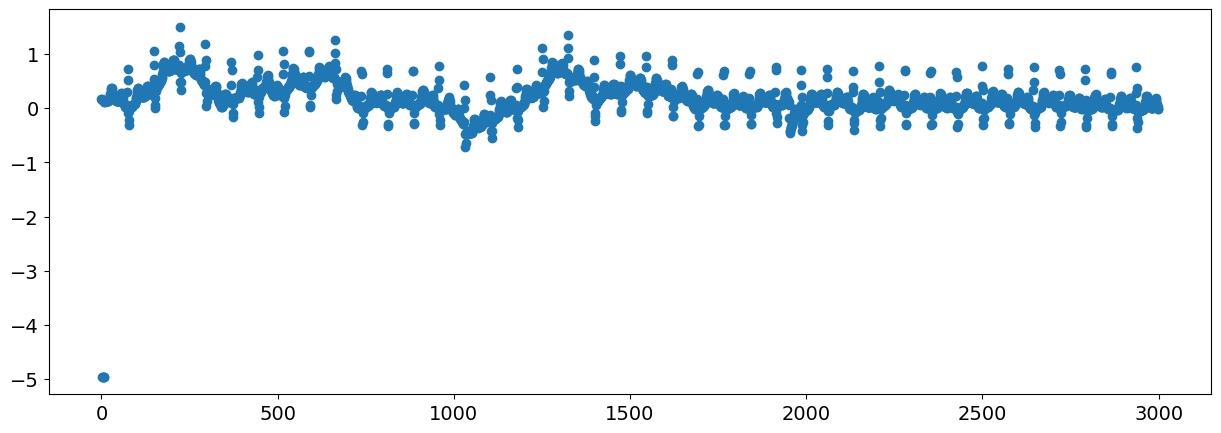

In [6]:
plt.scatter(o,signal[0:3000])
plt.show()

In [7]:
arr = np.array([])
count = []
i=0
for x in signal[0:5000]:
  if -0.75<=x<=0.75:
    arr = np.append(arr,[x])
    i = i+1
    count.append(i)

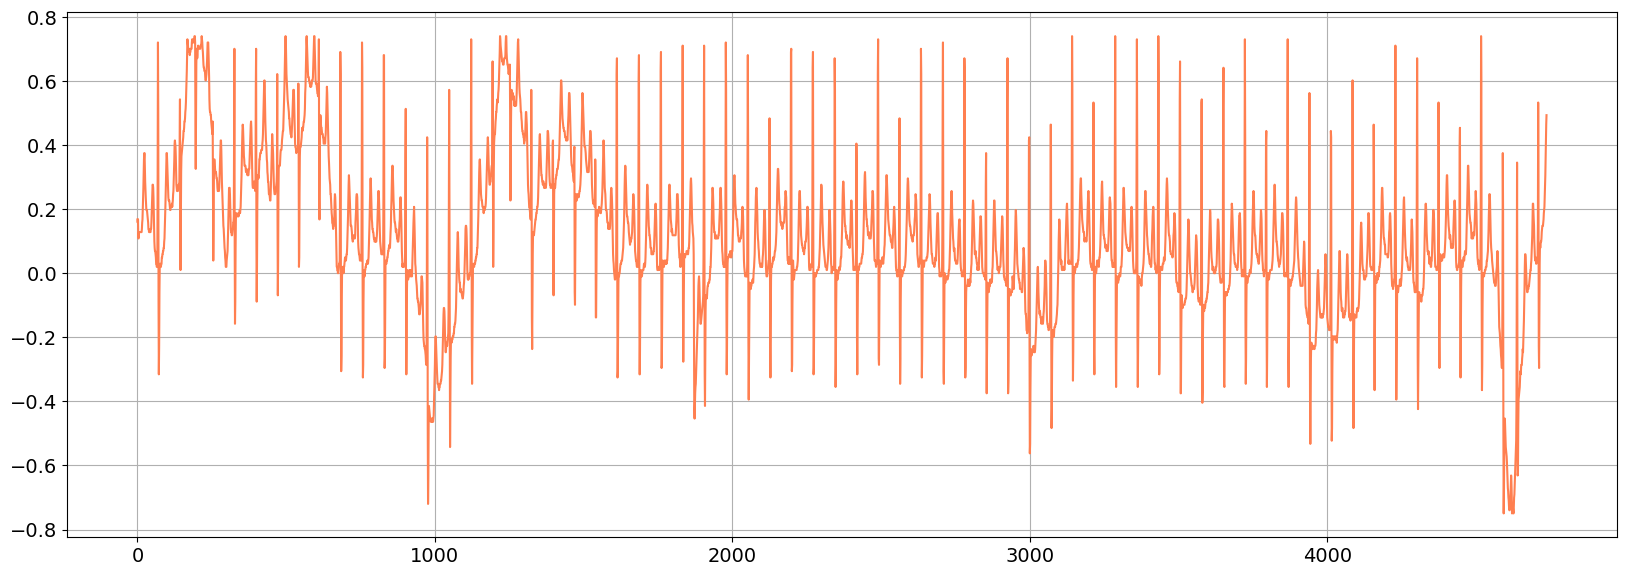

In [8]:
nrml_plt(arr)

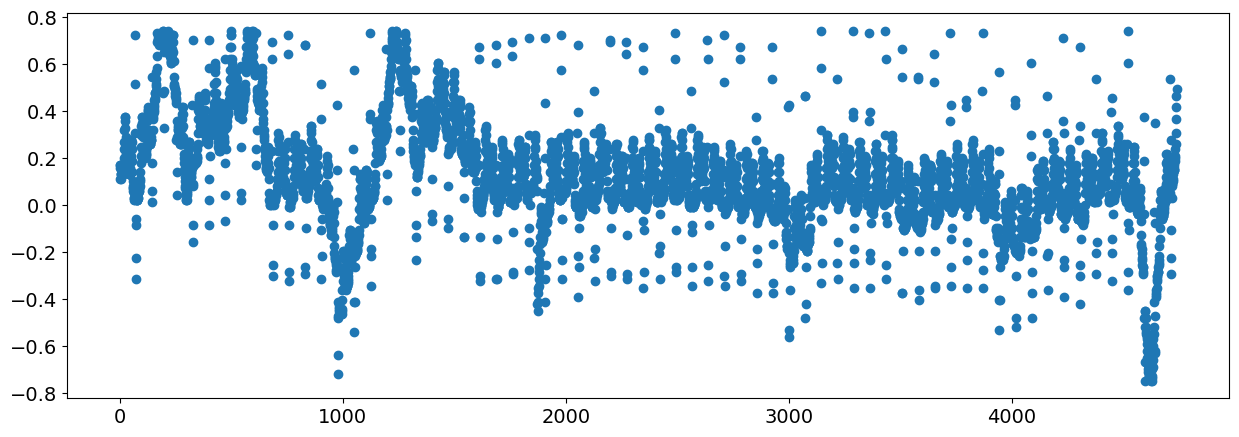

In [9]:
plt.scatter(count,arr)

plt.show()